In [1]:
onedrive = r"C:\Users\mikek\OneDrive"

from boututils.datafile import DataFile
from boutdata.collect import collect
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os, sys, pathlib
import platform
import traceback
import xarray as xr
import xbout
from pathlib import Path

sys.path.append(os.path.join(onedrive,r"Project\python-packages\sdtools"))

from hermes3.case_db import *
from hermes3.load import *
from hermes3.named_selections import *
from hermes3.plotting import *
from hermes3.grid_fields import *
from hermes3.accessors import *
from hermes3.utils import *

%load_ext autoreload
%autoreload 2


print("Done")

Done


In [2]:
cases = read_file(r"C:\Users\mikek\OneDrive\Project\collab\tech\notebooks\a4-performancetest.pkl")
casenames = cases.keys()
print(casenames)

C:\Users\mikek\OneDrive\Project\collab\tech\notebooks\a4-performancetest.pkl loaded
dict_keys(['za0-base', 'za1a-neutdifflim_6000', 'za1b-neutdifflim_1000', 'za3-noatomics', 'za4-remove_mxorder', 'za5-remove_maxl', 'za6-no_precon', 'za7a-atol_1e-11', 'za7b-atol_1e-13', 'za7c-rtol_1e-4', 'za7d-rtol_1e-6', 'za8-nomaxl_nomaxord', 'za9-beuler', 'za10a-emass_x2', 'za10b-emass_x10', 'zb0-base', 'zb10a-emass_x2', 'zb10b-emass_x10', 'zc0-tstep1', 'zc10a-emass_x2', 'zc10b-emass_x10', 'zc3-noatomics', 'zc1a-neutdifflim_6000', 'zc1b-neutdifflim_1000'])


In [ ]:
cases = dict()

In [3]:
db = CaseDB(case_dir = r"C:\Users\mikek\OneDrive\Project\collab\tech\cases")

casenames = [
    "za0-base",
    "za1a-neutdifflim_6000",
    "za1b-neutdifflim_1000",
    "za3-noatomics",
    "za4-remove_mxorder",
    "za5-remove_maxl",
    "za6-no_precon",
    "za7a-atol_1e-11",
    "za7b-atol_1e-13",
    "za7c-rtol_1e-4",
    "za7d-rtol_1e-6",
    "za8-nomaxl_nomaxord",
    "za9-beuler",
    "za10a-emass_x2",
    "za10b-emass_x10",
    
    "zb0-base",
    "zb10a-emass_x2",
    "zb10b-emass_x10",
    
    "zc0-tstep1",
    "zc1a-neutdifflim_6000",
    "zc1b-neutdifflim_1000",
    "zc3-noatomics",
    "zc10a-emass_x2",
    "zc10b-emass_x10",
    ]

print(f"Loading:")
for name in casenames:
    
    if name not in cases.keys():
        print(f"\n{name}...")
        cases[name] = Load.case_2D(db.casepaths[name], gridfilepath = db.gridpaths["g3a5-fatter.nc"], keep_boundaries = False)
    else:
        print(f"Skipping {name}...")
    


Loading:
Skipping za0-base...
Skipping za1a-neutdifflim_6000...
Skipping za1b-neutdifflim_1000...
Skipping za3-noatomics...
Skipping za4-remove_mxorder...
Skipping za5-remove_maxl...
Skipping za6-no_precon...
Skipping za7a-atol_1e-11...
Skipping za7b-atol_1e-13...
Skipping za7c-rtol_1e-4...
Skipping za7d-rtol_1e-6...
Skipping za8-nomaxl_nomaxord...
Skipping za9-beuler...
Skipping za10a-emass_x2...
Skipping za10b-emass_x10...
Skipping zb0-base...
Skipping zb10a-emass_x2...
Skipping zb10b-emass_x10...
Skipping zc0-tstep1...
Skipping zc1a-neutdifflim_6000...
Skipping zc1b-neutdifflim_1000...
Skipping zc3-noatomics...
Skipping zc10a-emass_x2...
Skipping zc10b-emass_x10...


In [65]:
write_file(cases, r"C:\Users\mikek\OneDrive\Project\collab\tech\notebooks\a4-performancetest.pkl")

C:\Users\mikek\OneDrive\Project\collab\tech\notebooks\a4-performancetest.pkl written


In [24]:
df = pd.DataFrame()

for name in casenames:
    for param in [
        "cvode_nfevals", 
        "cvode_npevals",
        "cvode_nliters", 
        "cvode_nniters", 
        "cvode_nsteps",
        "ncalls",
        
        
        "cvode_num_fails", 
        "cvode_nonlin_fails",
        
        "cvode_stab_lims",
        "cvode_last_order", 
        ]:

        if param in cases[name].ds.data_vars.keys():
            df.loc[name, param] = cases[name].ds.data_vars[param].values[-1]
        else:
            df.loc[name, param] = np.nan
            
    df.loc[name, "tstep"] = cases[name].ds.coords["t"].diff("t").values[-1]

df

,cvode_nfevals,cvode_npevals,cvode_nliters,cvode_nniters,cvode_nsteps,ncalls,cvode_num_fails,cvode_nonlin_fails,cvode_stab_lims,cvode_last_order,tstep
za0-base,723.0,8471.0,7751.0,720.0,434.0,8475.0,2.0,85.0,0.0,1.0,50.0
za1a-neutdifflim_6000,1172.0,13520.0,12351.0,1169.0,655.0,13524.0,0.0,205.0,0.0,1.0,50.0
za1b-neutdifflim_1000,2416.0,8262.0,5873.0,2413.0,1368.0,8290.0,32.0,0.0,0.0,1.0,50.0
za3-noatomics,2424.0,9866.0,7816.0,2421.0,1416.0,10241.0,25.0,18.0,0.0,1.0,50.0
za4-remove_mxorder,712.0,8028.0,7319.0,709.0,444.0,8032.0,0.0,65.0,0.0,1.0,50.0
za5-remove_maxl,324.0,1756.0,1435.0,321.0,186.0,1760.0,0.0,61.0,0.0,1.0,50.0
za6-no_precon,2256.0,0.0,33275.0,2253.0,1138.0,35532.0,0.0,553.0,0.0,1.0,50.0
za7a-atol_1e-11,823.0,10113.0,9293.0,820.0,479.0,10117.0,1.0,123.0,0.0,1.0,50.0
za7b-atol_1e-13,848.0,9620.0,8775.0,845.0,498.0,9624.0,0.0,105.0,0.0,1.0,50.0
za7c-rtol_1e-4,174.0,2384.0,2212.0,172.0,98.0,2387.0,1.0,31.0,0.0,1.0,50.0


In [22]:
cases["za8-nomaxl_nomaxord"].ds.coords["t"].diff("t").values

array([50.])

In [6]:
df["Total iterations"] = df["cvode_nliters"] + df["cvode_nniters"]
df["Total calls"] = df["ncalls"]
df["Nonl. iter. fraction"] = (df["cvode_nniters"] / (df["cvode_nliters"] + df["cvode_nniters"])).round(3)
df["Precon call fraction"] = (df["cvode_npevals"] / (df["cvode_npevals"] + df["cvode_nfevals"])).round(3)
df["Total fails"] = df["cvode_num_fails"] + df["cvode_nonlin_fails"]
df["Fails per step"] = ((df["cvode_num_fails"] + df["cvode_nonlin_fails"]) / df["cvode_nsteps"]).round(2)
df["Newton it per step"] = (df["cvode_nniters"] / df["cvode_nsteps"]).round(2)
df["Linear it per Newton it"] = (df["cvode_nliters"] / df["cvode_nniters"]).round(2)
df["Precon evals per RHS eval"] = (df["cvode_npevals"] / df["cvode_nfevals"]).round(2)
df["Precon evals per Newton it"] = (df["cvode_npevals"] / df["cvode_nniters"]).round(2)
df["Precon evals per linear it"] = (df["cvode_npevals"] / df["cvode_nliters"]).round(2)

df_norm = df.copy()

for col in df_norm:
    df_norm[col] = (df_norm[col] / df_norm[col].max()).round(2)

In [ ]:
# Variable definitions

In [ ]:
#   // Add diagnostics to output
#   // Needs to be in constructor not init() because init() is called after
#   // Solver::outputVars()
#   add_int_diagnostic(nsteps, "cvode_nsteps", "Cumulative number of internal steps");
#   add_int_diagnostic(nfevals, "cvode_nfevals", "No. of calls to r.h.s.  function");
#   add_int_diagnostic(nniters, "cvode_nniters", "No. of nonlinear solver iterations");
#   add_int_diagnostic(npevals, "cvode_npevals", "No. of preconditioner solves");
#   add_int_diagnostic(nliters, "cvode_nliters", "No. of linear iterations");
#   add_BoutReal_diagnostic(last_step, "cvode_last_step",
#                           "Step size used for the last step before each output");
#   add_int_diagnostic(last_order, "cvode_last_order",
#                      "Order used during the last step before each output");
#   add_int_diagnostic(num_fails, "cvode_num_fails",
#                      "No. of local error test failures that have occurred");
#   add_int_diagnostic(nonlin_fails, "cvode_nonlin_fails",
#                      "No. of nonlinear convergence failures");
#   add_int_diagnostic(stab_lims, "cvode_stab_lims",
#                      "No. of order reductions due to stability limit detection");

In [7]:
toplot = ["Total iterations", "Total calls", "Nonl. iter. fraction", "Precon call fraction", "Total fails"]

toplot = ["Total calls", "Linear it per Newton it", "Precon evals per linear it","Fails per step"]

def get_data(case_choice, labels = toplot):
    data = df.loc[case_choice][toplot]

    data_norm = data.copy()
    for col in data.columns:
        data_norm[col] = data_norm[col] / data_norm[col].max()
        
    return data, data_norm

def plot():
    data, data_norm = get_data(case_choice)
    w = 0.25
    x = np.array(range(len(data.columns)))
    fig, ax = plt.subplots(figsize = (6,6), dpi=120)
    ax.set_title(title)
    for i, name in enumerate(case_choice):
        norm_data = data.loc[name].values / data.loc[name].values.max()
        
        bars = ax.barh(x + w*i, height = w, width = data_norm.loc[name].values, label = labels[i], color = mike_cmap()[i], alpha = 0.6)
        ax.bar_label(bars, labels = data.loc[name].values, padding = 3, fontsize = 7)
    ax.set_yticks(x+w, data.columns)
    ax.set_xlim(None,ax.get_xlim()[1]*1.1)
    ax.invert_yaxis()
    ax.legend(loc="upper left", bbox_to_anchor=(1,1))
    ax.set_xlabel("Normalised factor")
    display(data)

Text(0.5, 0, 'Normalised factor')

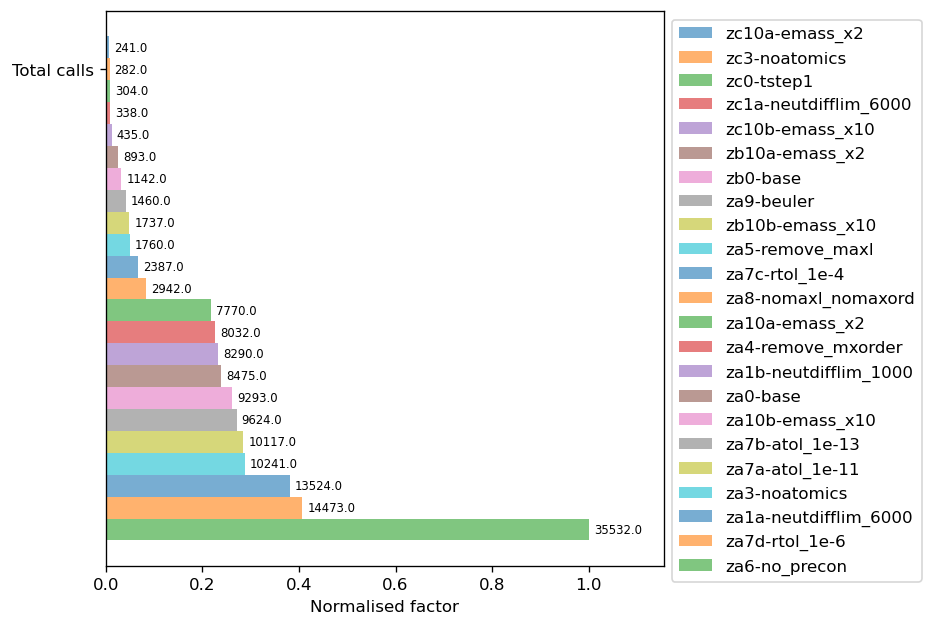

In [16]:


case_choice = df.index.drop("zc1b-neutdifflim_1000")
labels = case_choice
toplot = ["Total calls"]

data, data_norm = get_data(case_choice)

data_norm = data_norm.sort_values(by="Total calls")
case_choice = data_norm.index
labels = case_choice
w = 0.25
x = np.array(range(len(data.columns)))
fig, ax = plt.subplots(figsize = (6,6), dpi=120)
# ax.set_title(title)
for i, name in enumerate(case_choice):
    norm_data = data.loc[name].values / data.loc[name].values.max()
    
    bars = ax.barh(x + w*i, height = w, width = data_norm.loc[name].values, label = labels[i], alpha = 0.6)
    ax.bar_label(bars, labels = data.loc[name].values, padding = 3, fontsize = 7)
ax.set_yticks(x+w, data.columns)
ax.set_xlim(None,ax.get_xlim()[1]*1.1)
ax.invert_yaxis()
ax.legend(loc="upper left", bbox_to_anchor=(1,1))
ax.set_xlabel("Normalised factor")
# display(data)

## Tolerance settings

### atol

,Total calls,Linear it per Newton it,Precon evals per linear it,Fails per step
za7a-atol_1e-11,10117.0,11.33,1.09,0.26
za0-base,8475.0,10.77,1.09,0.20
za7b-atol_1e-13,9624.0,10.38,1.10,0.21


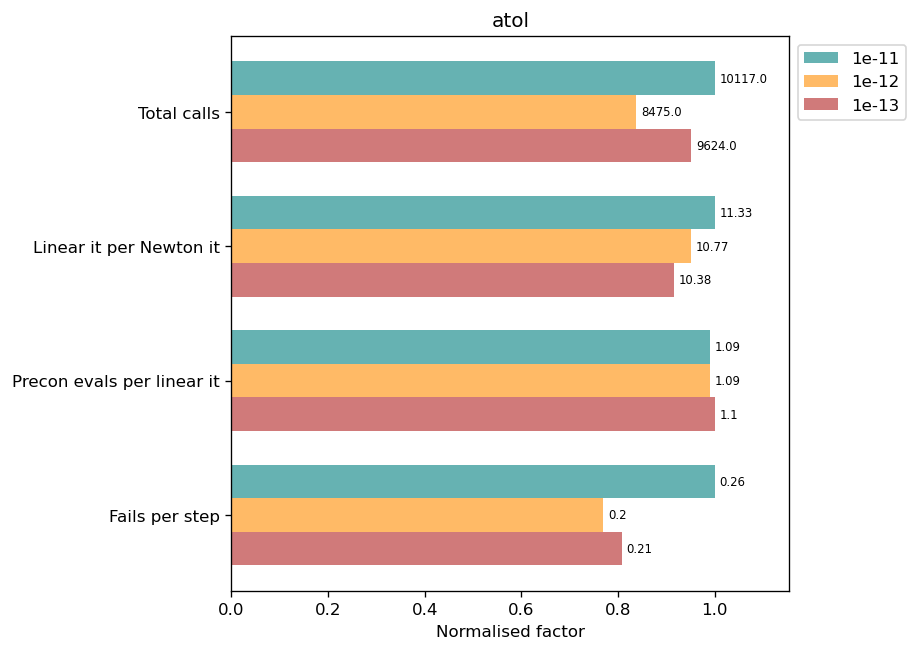

In [71]:
case_choice = ["za7a-atol_1e-11", "za0-base", "za7b-atol_1e-13"]
title = "atol"
labels = ["1e-11", "1e-12", "1e-13"]

plot()

### rtol

,Total calls,Linear it per Newton it,Precon evals per linear it,Fails per step
za7c-rtol_1e-4,2387.0,12.86,1.08,0.33
za0-base,8475.0,10.77,1.09,0.20
za7d-rtol_1e-6,14473.0,8.16,1.12,0.18


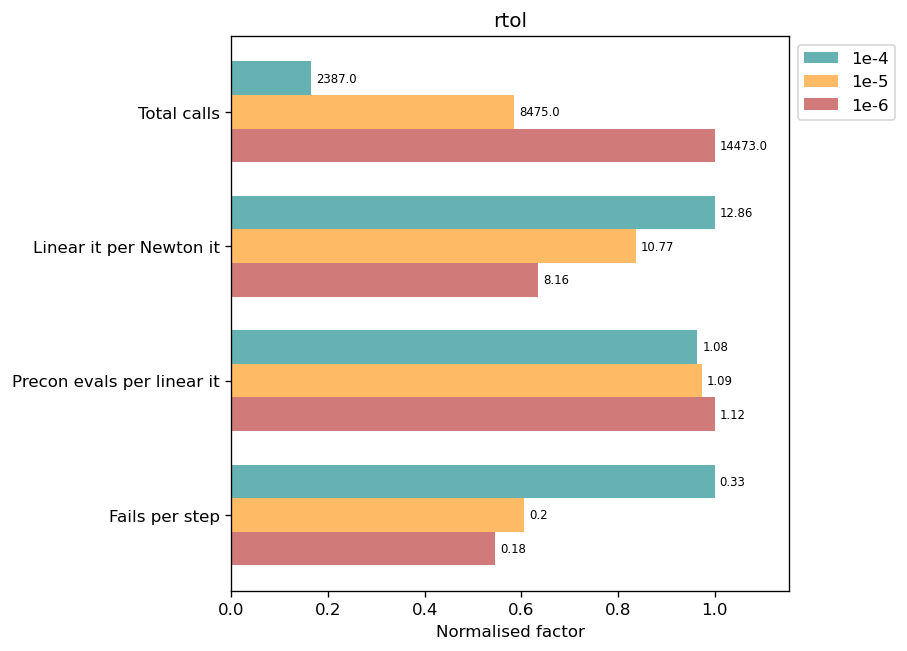

In [72]:
case_choice = ["za7c-rtol_1e-4", "za0-base", "za7d-rtol_1e-6"]
labels = ["1e-4", "1e-5", "1e-6"]
title = "rtol"

plot()

## Diffusion

,Total calls,Linear it per Newton it,Precon evals per linear it,Fails per step
zc0-tstep1,304.0,5.98,1.17,0.06
zc1a-neutdifflim_6000,338.0,5.55,1.18,0.09
zc1b-neutdifflim_1000,935142.0,11.32,1.09,0.24


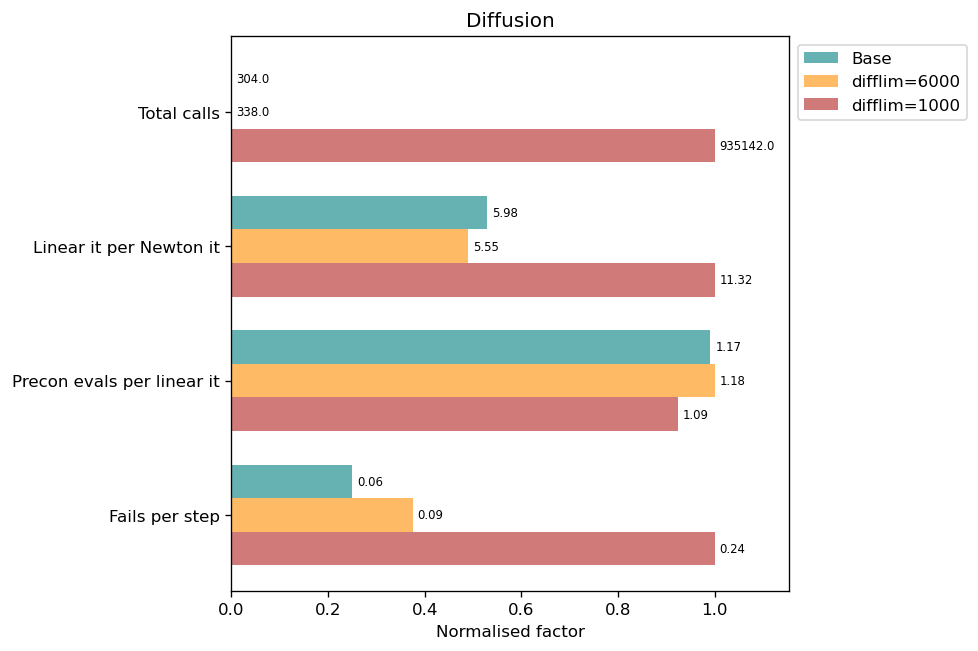

In [73]:
case_choice = ["zc0-tstep1", "zc1a-neutdifflim_6000", "zc1b-neutdifflim_1000"]
title = "Diffusion"
labels = ["Base", "difflim=6000", "difflim=1000"]

plot()

## Solver settings

,Total calls,Linear it per Newton it,Precon evals per linear it,Fails per step
za6-no_precon,35532.0,14.77,0.00,0.49
za0-base,8475.0,10.77,1.09,0.20
za4-remove_mxorder,8032.0,10.32,1.10,0.15
za5-remove_maxl,1760.0,4.47,1.22,0.33
za8-nomaxl_nomaxord,2942.0,4.45,1.22,0.38


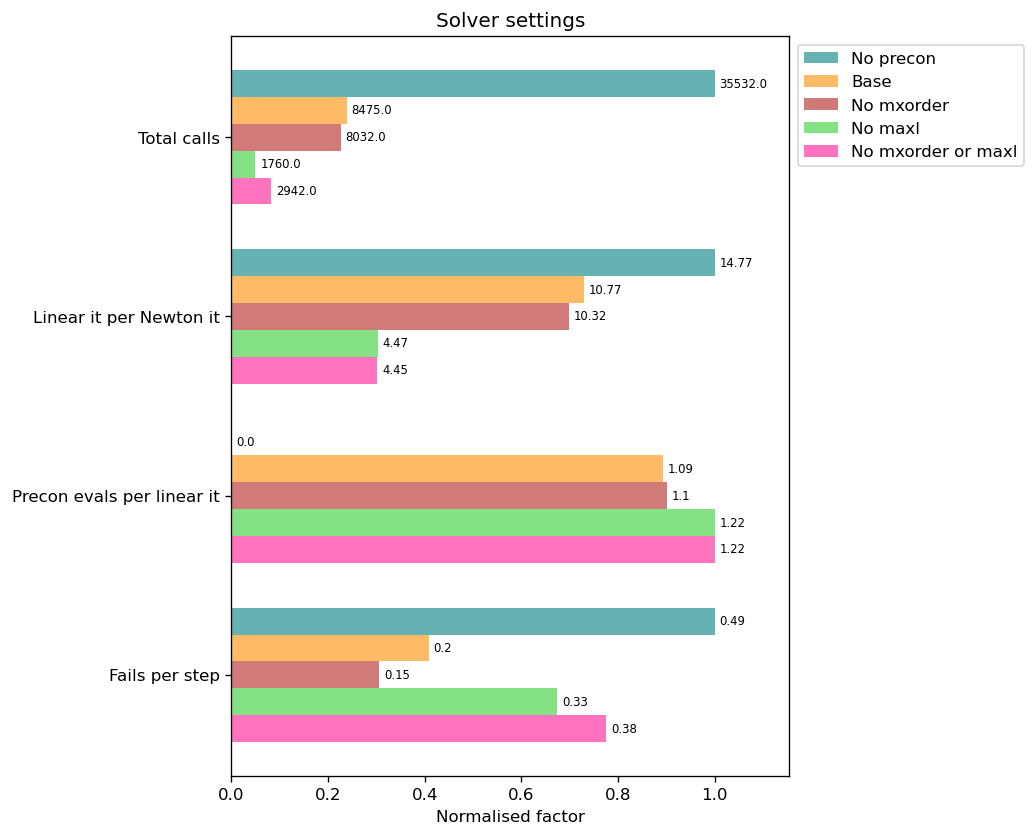

In [74]:
case_choice = ["za6-no_precon", "za0-base", "za4-remove_mxorder", "za5-remove_maxl", "za8-nomaxl_nomaxord"]
title = "Solver settings"
labels = ["No precon", "Base", "No mxorder", "No maxl", "No mxorder or maxl"]


data, data_norm = get_data(case_choice, toplot)
w = 0.15
x = np.array(range(len(data.columns)))
fig, ax = plt.subplots(figsize = (6,8), dpi=120)
ax.set_title(title)
for i, name in enumerate(case_choice):
    norm_data = data.loc[name].values / data.loc[name].values.max()
    
    bars = ax.barh(x + w*i, height = w, width = data_norm.loc[name].values, label = labels[i], color = mike_cmap()[i], alpha = 0.6)
    ax.bar_label(bars, labels = data.loc[name].values, padding = 3, fontsize = 7)
ax.set_yticks(x+w*2, data.columns)
ax.set_xlim(None,ax.get_xlim()[1]*1.1)
ax.invert_yaxis()
ax.legend(loc="upper left", bbox_to_anchor=(1,1))
ax.set_xlabel("Normalised factor")
display(data)

## Atomics

,Total calls,Linear it per Newton it,Precon evals per linear it,Fails per step
za0-base,9194.0,10.77,1.09,0.20
za3-noatomics,12290.0,3.23,1.26,0.03


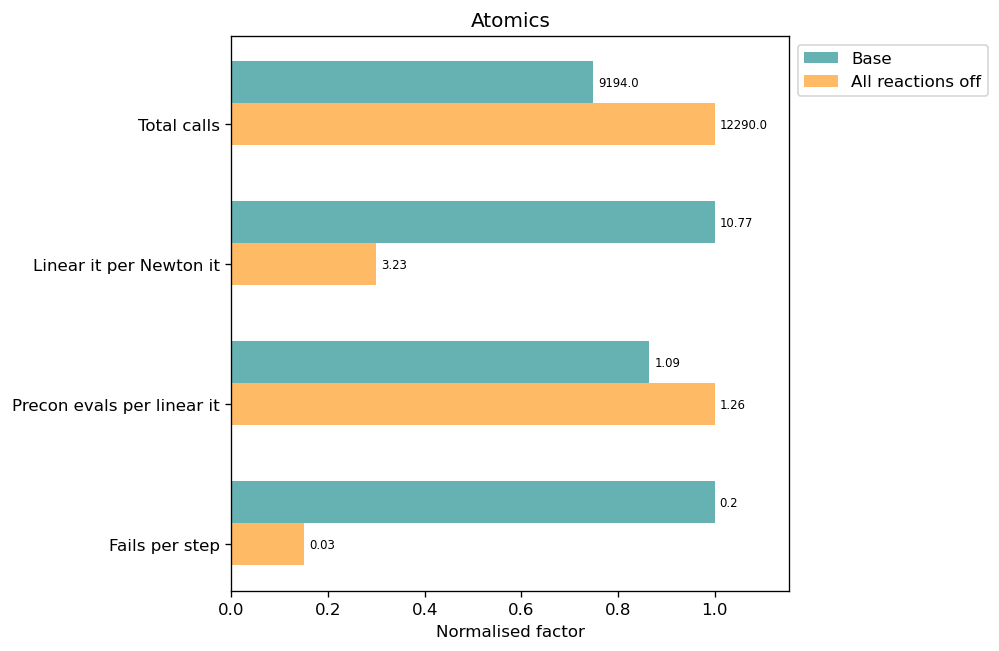

In [56]:
case_choice = ["za0-base", "za3-noatomics"]
title = "Atomics"
labels = ["Base", "All reactions off"]


data, data_norm = get_data(case_choice, toplot)
w = 0.3
x = np.array(range(len(data.columns)))
fig, ax = plt.subplots(figsize = (6,6), dpi=120)
ax.set_title(title)
for i, name in enumerate(case_choice):
    norm_data = data.loc[name].values / data.loc[name].values.max()
    
    bars = ax.barh(x + w*i, height = w, width = data_norm.loc[name].values, label = labels[i], color = mike_cmap()[i], alpha = 0.6)
    ax.bar_label(bars, labels = data.loc[name].values, padding = 3, fontsize = 7)
ax.set_yticks(x+w, data.columns)
ax.set_xlim(None,ax.get_xlim()[1]*1.1)
ax.invert_yaxis()
ax.legend(loc="upper left", bbox_to_anchor=(1,1))
ax.set_xlabel("Normalised factor")
display(data)

### tstep =1

,Total calls,Linear it per Newton it,Precon evals per linear it,Fails per step
zc0-tstep1,346.0,5.98,1.17,0.06
zc3-noatomics,362.0,2.43,1.41,0.00


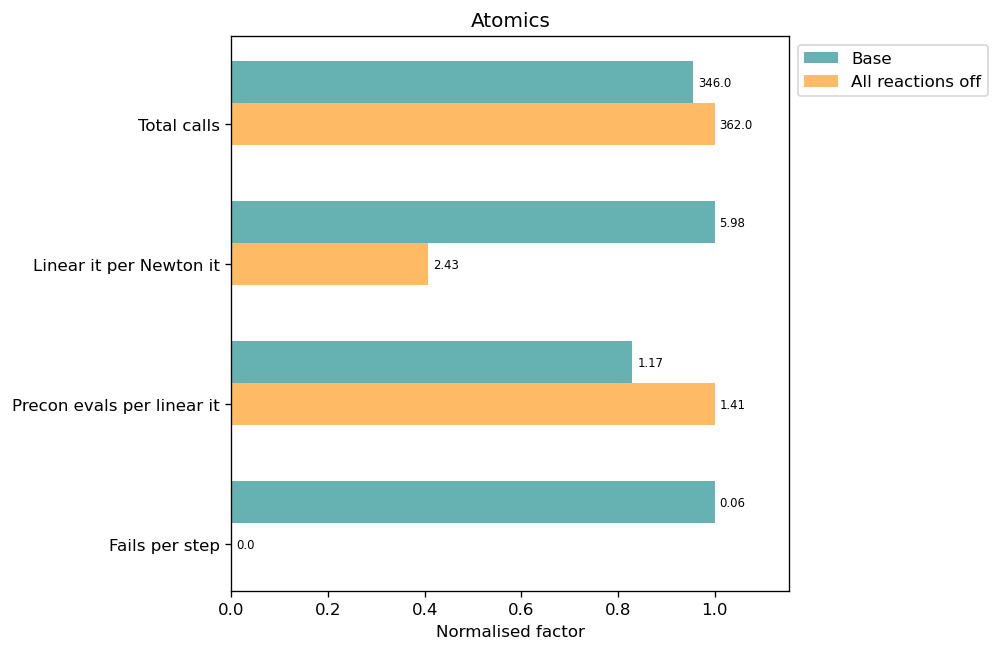

In [57]:
case_choice = ["zc0-tstep1", "zc3-noatomics"]
title = "Atomics"
labels = ["Base", "All reactions off"]

# toplot = ["Total iterations", "Total calls", "Nonl. iter. fraction", "Precon call fraction", "Total fails"]
# toplot = ["Total calls", "Newton it per step", "Linear it per Newton it", "Precon evals per Newton it"]

data, data_norm = get_data(case_choice, toplot)
w = 0.3
x = np.array(range(len(data.columns)))
fig, ax = plt.subplots(figsize = (6,6), dpi=120)
ax.set_title(title)
for i, name in enumerate(case_choice):
    norm_data = data.loc[name].values / data.loc[name].values.max()
    
    bars = ax.barh(x + w*i, height = w, width = data_norm.loc[name].values, label = labels[i], color = mike_cmap()[i], alpha = 0.6)
    ax.bar_label(bars, labels = data.loc[name].values, padding = 3, fontsize = 7)
ax.set_yticks(x+w, data.columns)
ax.set_xlim(None,ax.get_xlim()[1]*1.1)
ax.invert_yaxis()
ax.legend(loc="upper left", bbox_to_anchor=(1,1))
ax.set_xlabel("Normalised factor")
display(data)

## Electron mass

,Total calls,Newton it per step,Linear it per Newton it,Precon evals per Newton it
za0-base,9194.0,1.66,10.77,11.77
za10a-emass_x2,9174.0,1.78,4.13,5.06
za10b-emass_x10,12011.0,1.74,1.03,1.62


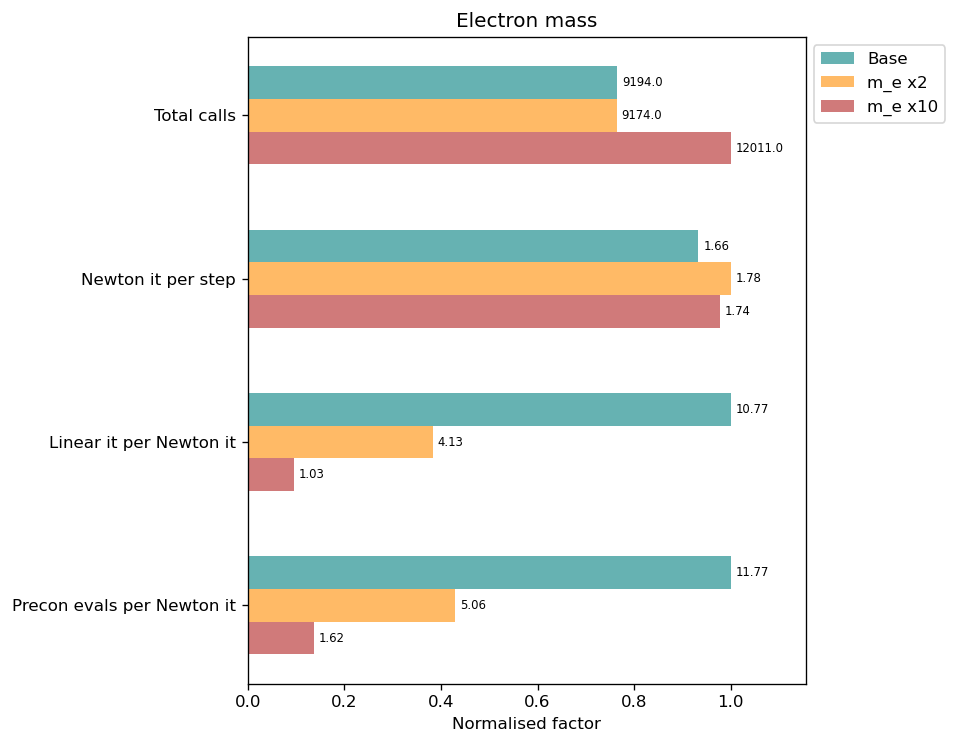

In [43]:
case_choice = ["za0-base", "za10a-emass_x2", "za10b-emass_x10"]
title = "Electron mass"
labels = ["Base", "m_e x2", "m_e x10"]


data, data_norm = get_data(case_choice, toplot)
w = 0.20
x = np.array(range(len(data.columns)))
fig, ax = plt.subplots(figsize = (6,7), dpi=120)
ax.set_title(title)
for i, name in enumerate(case_choice):
    norm_data = data.loc[name].values / data.loc[name].values.max()
    
    bars = ax.barh(x + w*i, height = w, width = data_norm.loc[name].values, label = labels[i], color = mike_cmap()[i], alpha = 0.6)
    ax.bar_label(bars, labels = data.loc[name].values, padding = 3, fontsize = 7)
ax.set_yticks(x+w, data.columns)
ax.set_xlim(None,ax.get_xlim()[1]*1.1)
ax.invert_yaxis()
ax.legend(loc="upper left", bbox_to_anchor=(1,1))
ax.set_xlabel("Normalised factor")
display(data)

### Reducing timestep 50 -> 1

,Total calls,Linear it per Newton it,Precon evals per linear it,Fails per step
zc0-tstep1,346.0,5.98,1.17,0.06
zc10a-emass_x2,318.0,1.77,1.51,0.00
zc10b-emass_x10,593.0,0.75,1.86,0.03


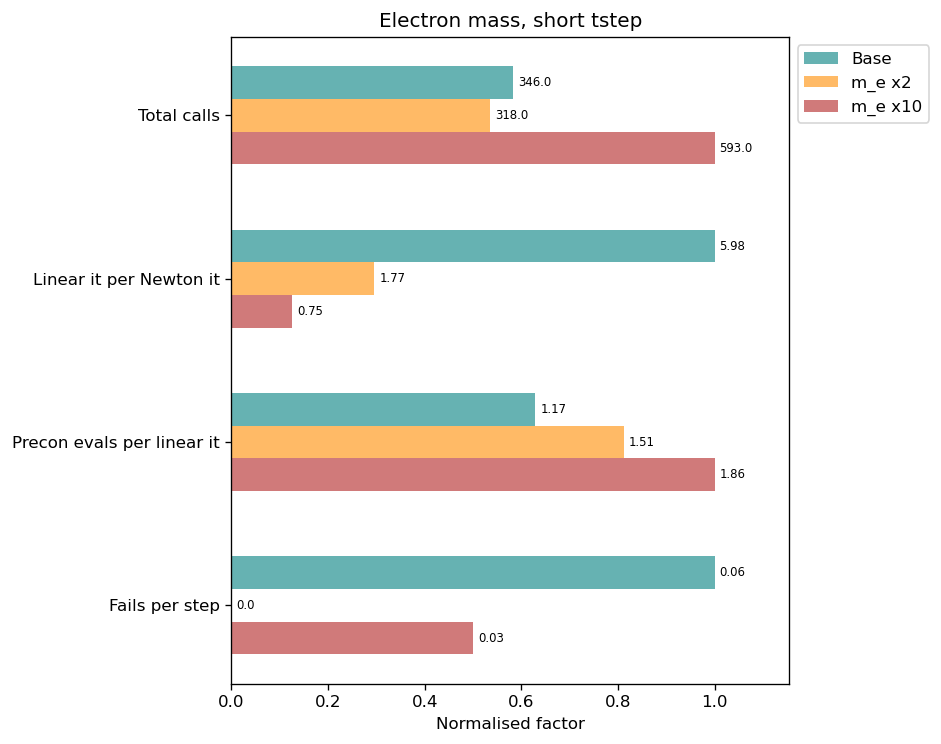

In [58]:
case_choice = ["zc0-tstep1", "zc10a-emass_x2", "zc10b-emass_x10"]
title = "Electron mass, short tstep"
labels = ["Base", "m_e x2", "m_e x10"]


data, data_norm = get_data(case_choice, toplot)
w = 0.20
x = np.array(range(len(data.columns)))
fig, ax = plt.subplots(figsize = (6,7), dpi=120)
ax.set_title(title)
for i, name in enumerate(case_choice):
    norm_data = data.loc[name].values / data.loc[name].values.max()
    
    bars = ax.barh(x + w*i, height = w, width = data_norm.loc[name].values, label = labels[i], color = mike_cmap()[i], alpha = 0.6)
    ax.bar_label(bars, labels = data.loc[name].values, padding = 3, fontsize = 7)
ax.set_yticks(x+w, data.columns)
ax.set_xlim(None,ax.get_xlim()[1]*1.1)
ax.invert_yaxis()
ax.legend(loc="upper left", bbox_to_anchor=(1,1))
ax.set_xlabel("Normalised factor")
display(data)

## beuler

In [5]:
df[["za0-base", "za9-beuler"]]

,za0-base,za9-beuler
ncalls,8475.0,1460.0
cvode_nsteps,434.0,NaN
cvode_nliters,7751.0,NaN
cvode_nniters,720.0,NaN
cvode_num_fails,2.0,NaN
cvode_nonlin_fails,85.0,NaN
cvode_nfevals,723.0,NaN
cvode_npevals,8471.0,NaN
cvode_stab_lims,0.0,NaN
cvode_last_order,1.0,NaN
